# Loan Application Status Prediction

Problem Statement

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status



# Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

loading the dataset

In [2]:
ds=pd.read_csv('loan_prediction.csv')
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Analysis

In [3]:
ds.shape

(614, 13)

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
ds['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
ds['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
ds['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
ds['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# Data Visualisations

In [15]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

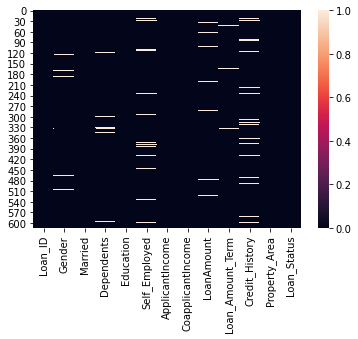

In [17]:
sns.heatmap(ds.isnull())

we are seeing that null values are present in dataset so we have to remove that first

In [23]:
ds['LoanAmount']=ds['LoanAmount'].fillna(np.mean(ds['LoanAmount']))

In [28]:
ds['Loan_Amount_Term']=ds['Loan_Amount_Term'].fillna(np.mean(ds['Loan_Amount_Term']))
ds['Credit_History']=ds['Credit_History'].fillna(np.median(ds['Credit_History']))

In [26]:
ds.dropna(inplace=True)

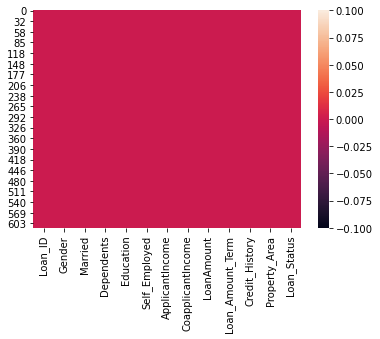

In [29]:
sns.heatmap(ds.isnull())

we can see now there is no any null values are present in dataset

In [30]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


now in data we see there is categorical value so we have to change those into numerical values

In [31]:
ds.drop('Loan_ID',inplace=True,axis=1)

# Object type data mapping

In [33]:
ds.Gender=ds.Gender.map({'Male':1,'Female':0})
ds.Married=ds.Married.map({'Yes':1,'No':0})
ds.Education=ds.Education.map({'Graduate':1,'Not Graduate':0})
ds.Self_Employed=ds.Self_Employed.map({'Yes':1,'No':0})
ds.Property_Area=ds.Property_Area.map({'Urban':1,'Rural':0,'Semiurban':2})

In [35]:
ds.dtypes

Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

In [36]:
ds.Loan_Status=ds.Loan_Status.map({'Y':1,'N':0})
ds.Dependents = ds.Dependents.map({'0':0, '1':1, '2':2, '3+':3})

In [37]:
ds.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

now we can see all values are in numerical form

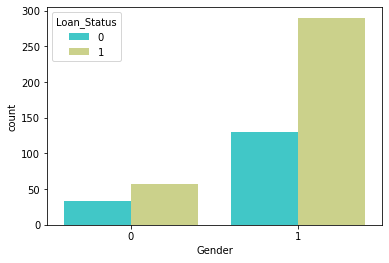

In [38]:
sns.countplot(ds['Gender'],hue=ds['Loan_Status'],palette='rainbow')

here we can see the data between Gender and loan status

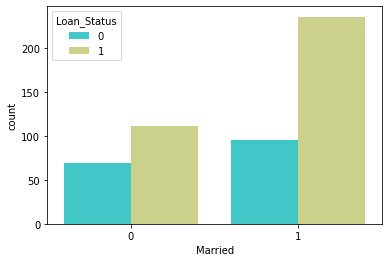

In [39]:
sns.countplot(ds['Married'],hue=ds['Loan_Status'],palette='rainbow')

here we can see the relation between married ones to loan status

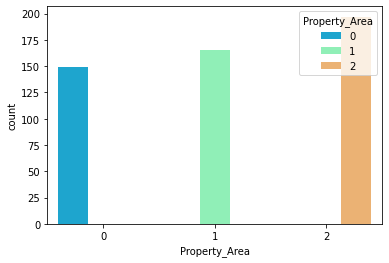

In [40]:
sns.countplot(ds['Property_Area'],hue=ds['Property_Area'],palette='rainbow')

here we can see the relation between Property_area to loan status

In [42]:
ds.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,511.000000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.821918,0.64775,0.769080,0.784736,0.136986,5308.146771,1561.997886,144.220804,342.011742,0.843444,1.093933,0.679061
std,0.382957,0.47814,1.020142,0.411408,0.344170,5561.209487,2559.383166,78.266321,64.092763,0.363738,0.818285,0.467295
min,0.000000,0.00000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,1.000000,0.000000,2885.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.00000,0.000000,1.000000,0.000000,3858.000000,1086.000000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.00000,2.000000,1.000000,0.000000,5820.000000,2253.500000,165.500000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.00000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


# Plotting correlation matrix

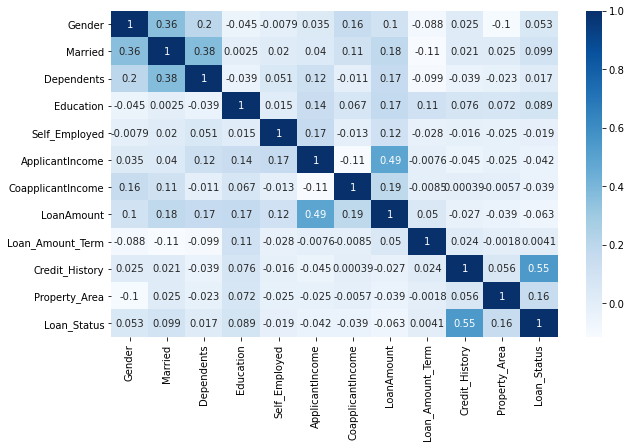

In [45]:
fig=plt.figure(figsize=(10,6))
df=ds.corr(method='pearson')
sns.heatmap(df,annot=True,cmap='Blues')

In [46]:
ds.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

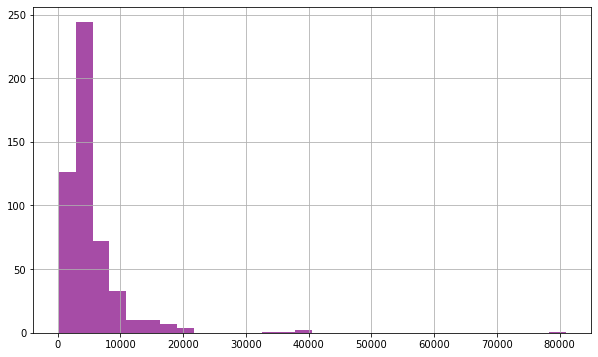

In [47]:
ds['ApplicantIncome'].hist(bins=30,color='purple',alpha=0.7,figsize=(10,6))

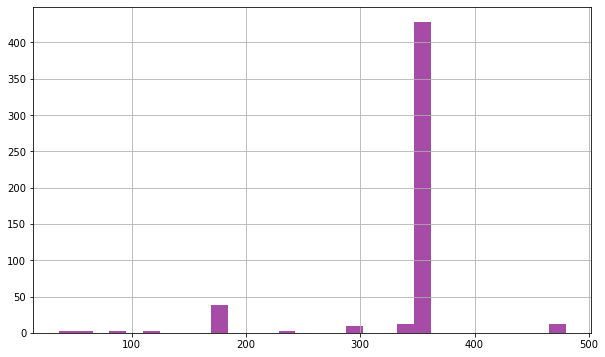

In [48]:
ds['Loan_Amount_Term'].hist(bins=30,color='purple',alpha=0.7,figsize=(10,6))

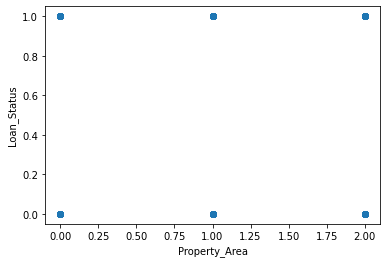

In [51]:
plt.scatter(ds.Property_Area,ds.Loan_Status)
plt.xlabel('Property_Area')
plt.ylabel('Loan_Status')
plt.show()

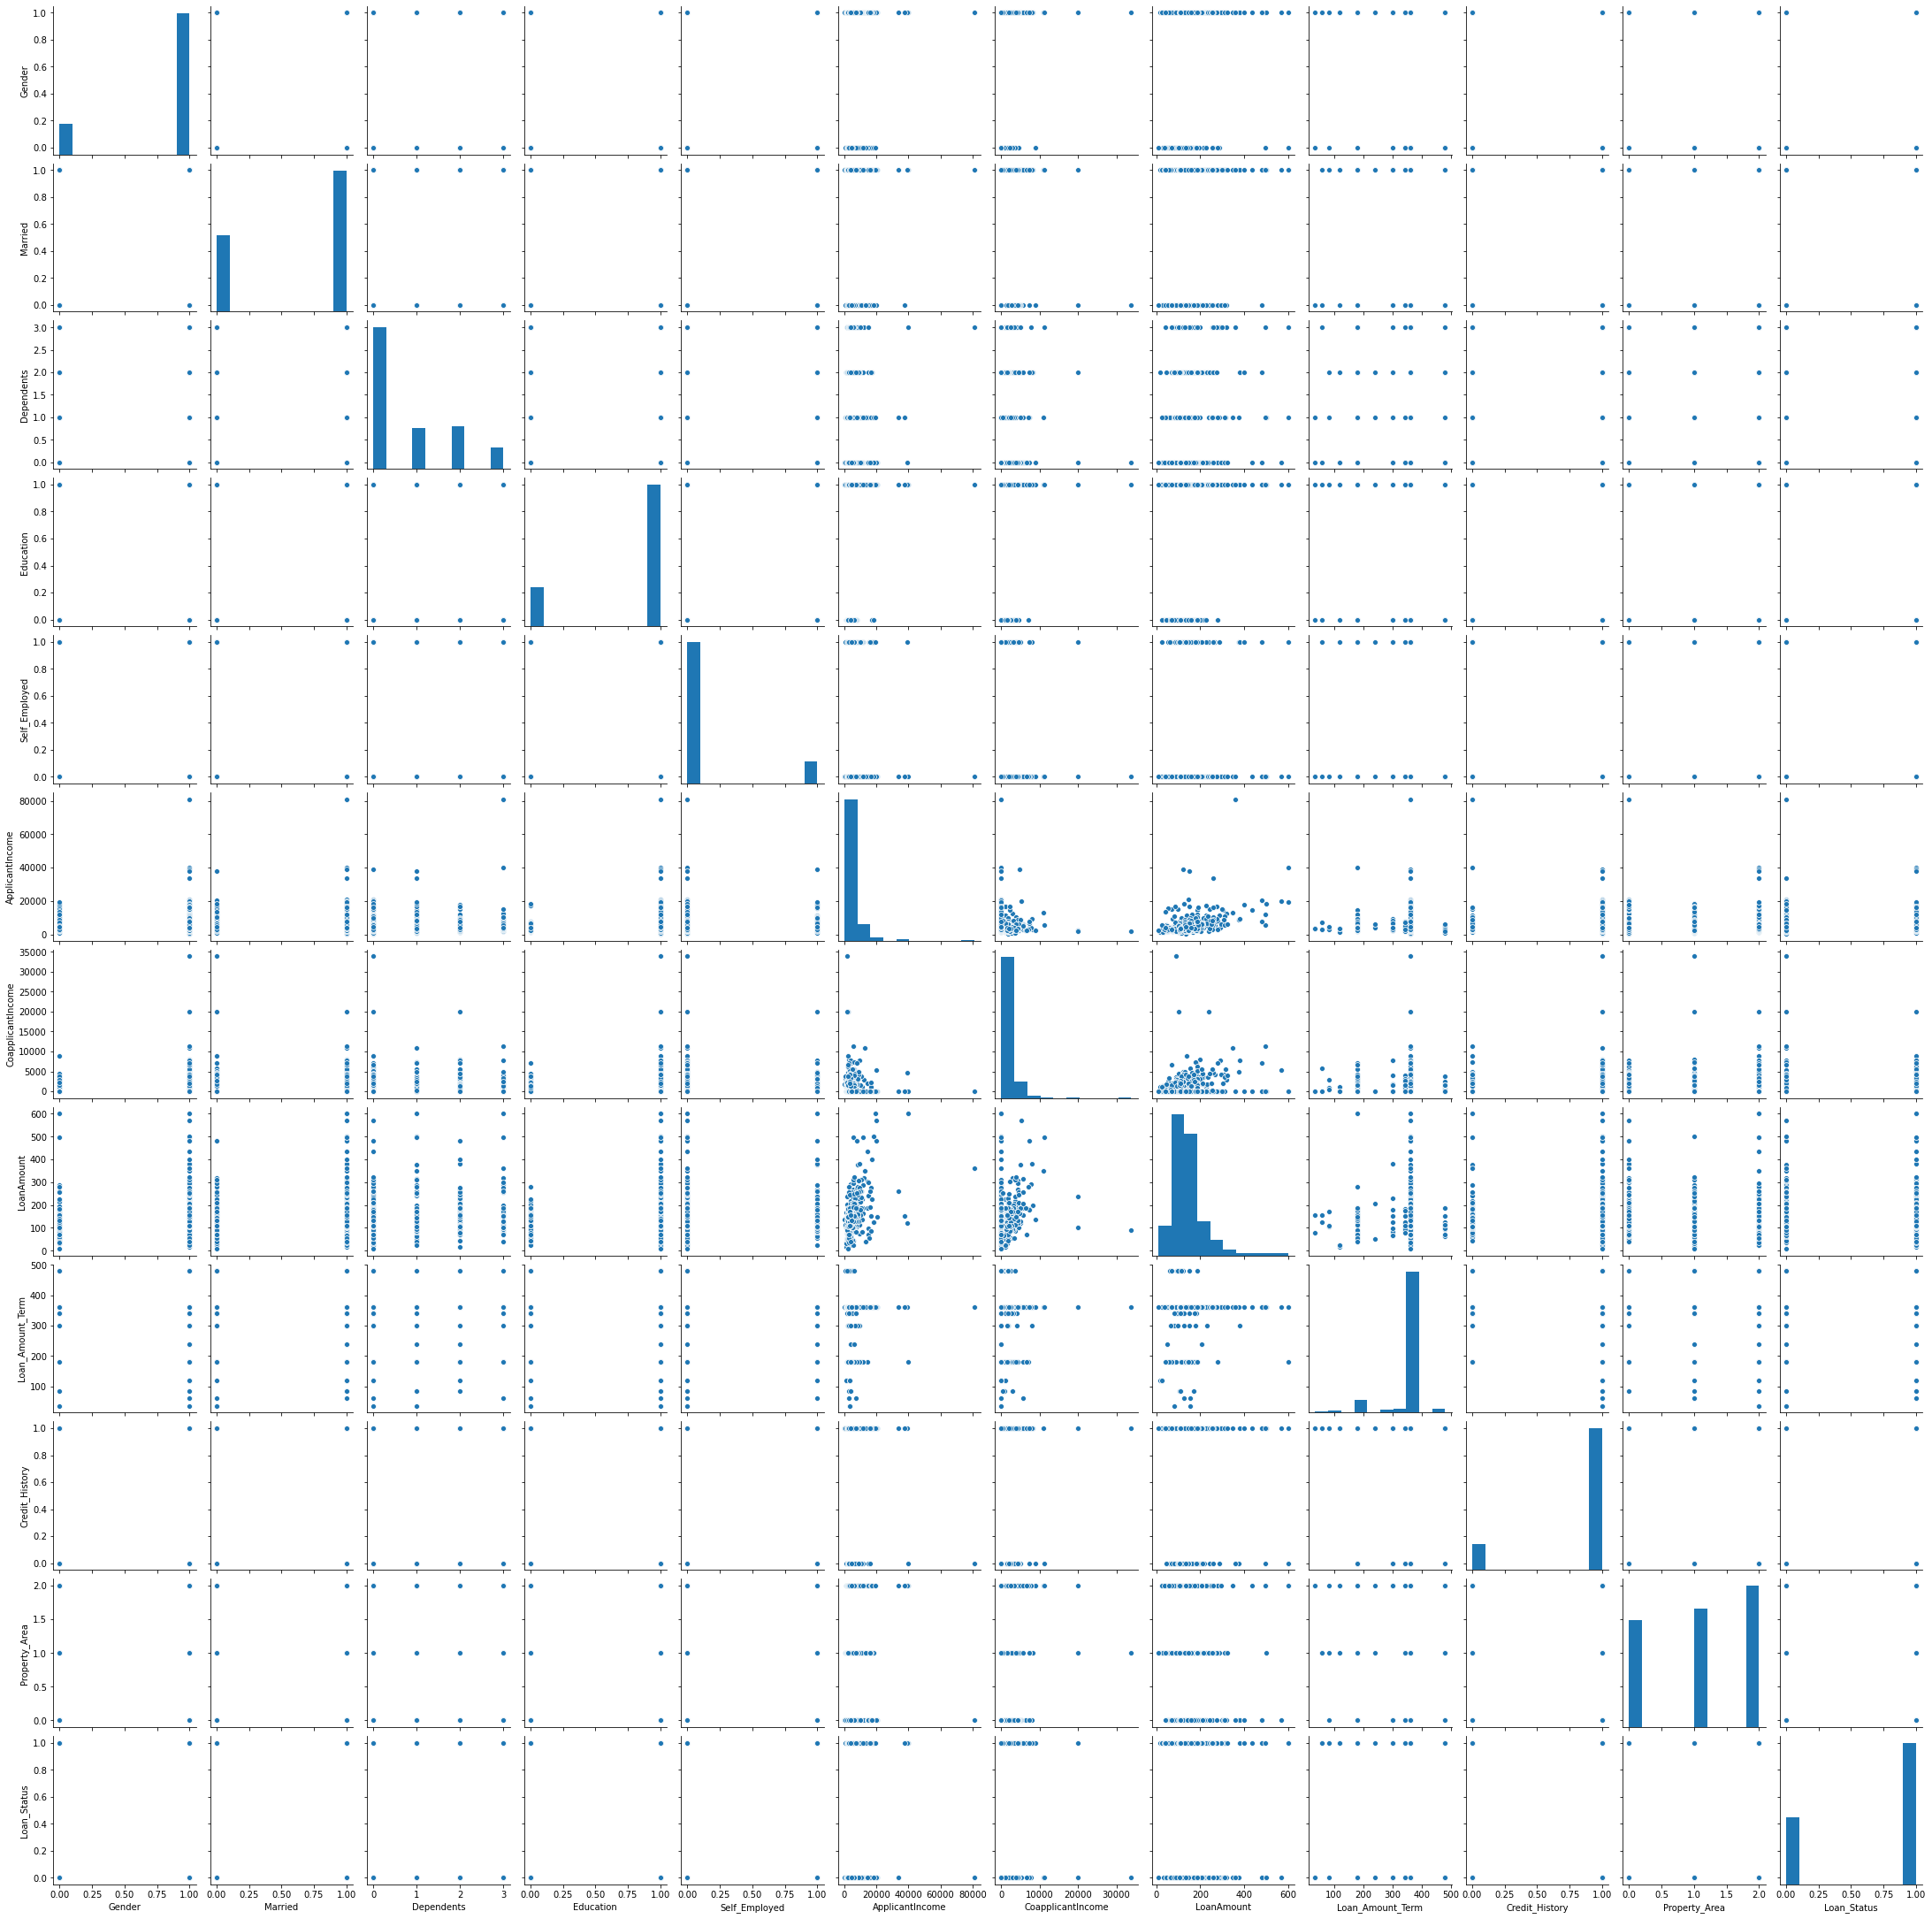

In [49]:
sns.pairplot(ds)

# Checking outliers

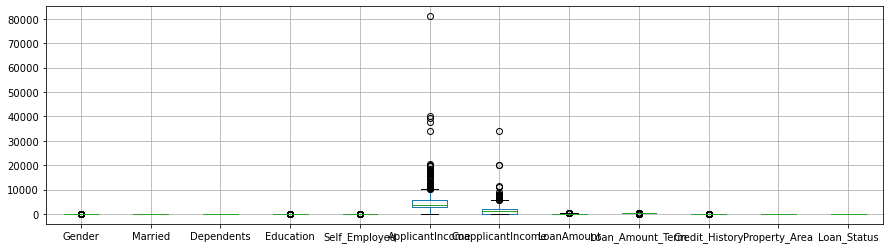

In [50]:
ds.iloc[:,0:12].boxplot(figsize=[15,4])
plt.subplots
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2bfeb259250>,
 'caps': [<matplotlib.lines.Line2D at 0x2bfeb259910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bfeb249f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2bfeb259e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bfeb263190>],
 'means': []}

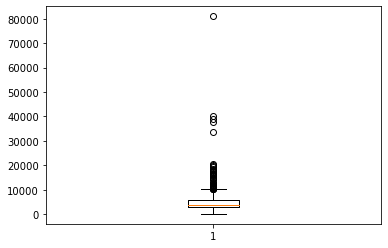

In [52]:
plt.boxplot(ds.ApplicantIncome)

{'whiskers': [<matplotlib.lines.Line2D at 0x2bfeb2ac850>,
 'caps': [<matplotlib.lines.Line2D at 0x2bfeb2acf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bfeb2ac4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bfeb2ba610>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bfeb2ba910>],
 'means': []}

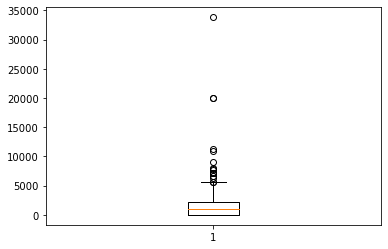

In [53]:
plt.boxplot(ds.CoapplicantIncome)

we can see in both of the above boxplot lots of outliers are present so we have to remove these ouliers 

Removing Outliers

In [54]:
from scipy.stats import zscore
zscr=np.abs(zscore(ds))

threshold=3
print(np.where(zscr>3))


(array([  9,  13,  60,  83, 110, 132, 132, 150, 150, 155, 157, 204, 222,
       237, 263, 308, 311, 335, 342, 349, 373, 407, 413, 436, 438, 454,
       468, 480, 484, 487, 501], dtype=int64), array([6, 8, 8, 8, 8, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 7, 7, 6, 5, 6, 5, 7,
       8, 7, 7, 8, 7, 8, 6, 8, 7], dtype=int64))


In [55]:
zscr[9][6]

3.678706375157526

In [56]:
zscr[60][8]

4.404367623317981

In [57]:
zscr[501][7]

4.499047681954197

In [58]:
print("shape before removing the outliers:",ds.shape)

dsnew=ds[(zscr<3).all(axis=1)]

print("shape after removing the outliers:",dsnew.shape)

shape before removing the outliers: (511, 12)
shape after removing the outliers: (482, 12)


now we can see outliers are removed

# Train Test Split

In [59]:
x=ds.iloc[:,0:-1]

In [60]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1


In [61]:
y=ds.iloc[:,-1]

In [62]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(357, 11)
(357,)
(154, 11)
(154,)


# Model Building

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [68]:
KNN=KNeighborsClassifier()
DTC=DecisionTreeClassifier()
RF=RandomForestClassifier()
AD=AdaBoostClassifier()
GDB=GradientBoostingClassifier()

In [70]:
model=[KNN,DTC,RF,AD,GDB]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score:', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print(score.std())


accuracy score: KNeighborsClassifier()
0.551948051948052
[[11 44]
 [25 74]]
              precision    recall  f1-score   support

           0       0.31      0.20      0.24        55
           1       0.63      0.75      0.68        99

    accuracy                           0.55       154
   macro avg       0.47      0.47      0.46       154
weighted avg       0.51      0.55      0.52       154

[0.66019417 0.65686275 0.65686275 0.55882353 0.62745098]
0.6320388349514563
0.03848819446074449
accuracy score: DecisionTreeClassifier()
0.7077922077922078
[[30 25]
 [20 79]]
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        55
           1       0.76      0.80      0.78        99

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

[0.76699029 0.68627451 0.76470588 0.74509804 0.75490196]
0.7435941366837997
0.02969428931163007

In [ ]:
sns.barplot(x='models', y='scores', data=df_x.sort_values(by='scores'))

# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV


In [75]:
parameters = {'max_depth': np.arange(2,15),'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}

In [76]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [78]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}

In [79]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [80]:
accuracy_score(y_test,GCV_pred)

0.7792207792207793

# Saving the best model

In [83]:
import joblib
joblib.dump(GCV.best_estimator_,'Loan_predictionRF.pkl')

['Loan_predictionRF.pkl']